


# **Pearson Delignification Analysis**



**Importing Required Library**

In [95]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as stats
import statsmodels.formula.api as sm

dir_DESs = np.array(['ls71','ls101','msw2110','msw2120','msw3120','tsw3125','tsw4125'])
colour = ['k-','y-','r-','b-','c-','g-','m-']
point = ['ko','yo','ro','bo','co','go','mo']
path = '/home/azuka/Documents/TA/data olahan/'

**INPUTING SIMULATION DATA**

In [12]:
DES = ['ls71','ls101','msw2110','msw2120','msw3120','tsw3125','tsw4125']

for i in range(len(dir_DESs)):
        a = dir_DESs[i] +'.csv'
        DES[i] = pd.read_csv("Berdasarkan DESs/"+a, sep = ',', decimal = '.')
        DES[i]['nonbonding'] = DES[i]['LJSR'] + DES[i]['CSR']

        
#CUT PANDAS 50 DATA TERAKHIR
        
DES_50 = ['ls71','ls101','msw2110','msw2120','msw3120','tsw3125','tsw4125'] 

for i in range(len(DES)):
    DES_50[i] = DES[i].iloc[4950:5001,:]

**Show The Table**

In [15]:
DES[0]

,Time,sasa,gyrate,hbond,LJSR,CSR,nonbonding
0,0.0,25.516,0.874558,42.0,-967.901855,-3006.546387,-3974.448242
1,100.0,25.899,0.869757,39.0,-867.029480,-3256.874023,-4123.903503
2,200.0,26.739,0.882052,43.0,-864.365051,-3073.437500,-3937.802551
3,300.0,27.445,0.888013,34.0,-792.838501,-3383.431641,-4176.270142
4,400.0,26.236,0.876748,41.0,-958.232361,-3100.524414,-4058.756775
...,...,...,...,...,...,...,...
4996,499600.0,36.658,1.489580,59.0,-1390.616943,-3341.753418,-4732.370361
4997,499700.0,37.392,1.511260,57.0,-1227.080688,-3279.642578,-4506.723266
4998,499800.0,38.274,1.545930,54.0,-1142.185547,-3297.065186,-4439.250733
4999,499900.0,37.976,1.562800,57.0,-1300.147705,-3179.510742,-4479.658447


**PLOT FUNCTION**

In [22]:
def plot(kolom, title_plot, unit,A,B):

    y = ['ls71','ls101','msw2110','msw2120','msw3120','tsw3125','tsw4125']

    x = DES[0].iloc[A:B,0]/1000
    for i in range(len(y)):
        y[i] = DES[i].iloc[A:B,kolom]
        plt.plot(x,y[i],colour[i],label = dir_DESs[i])

    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*0.85, box.height])
    
    plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
    plt.title(title_plot)
    plt.ylabel(unit)
    plt.xlim(A/10,500)
    plt.xlabel("Time (ns)")

    #plt.savefig(title_plot+'.png', dpi = 500, bbox_inches='tight') 
    plt.show()


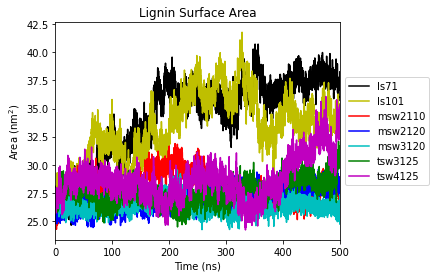

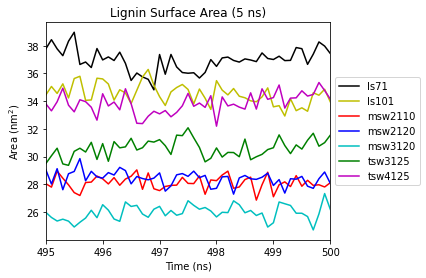

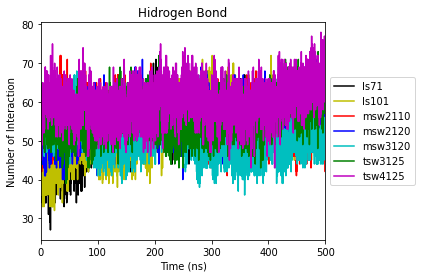

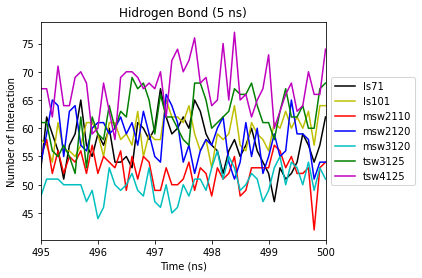

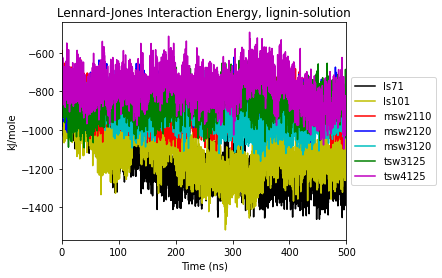

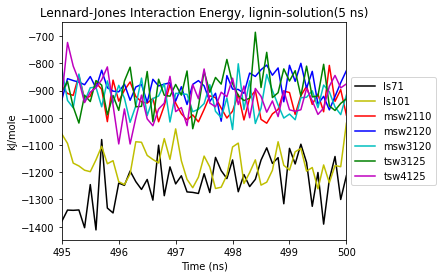

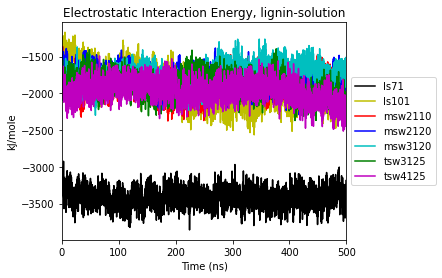

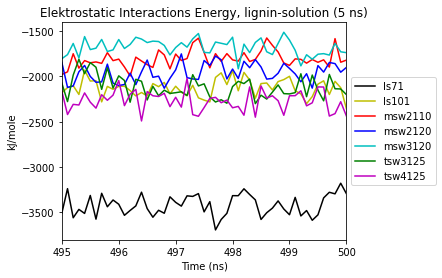

In [24]:
plot(1, 'Lignin Surface Area', 'Area (nm$^{2}$)', 0, 5001)
plot(1, 'Lignin Surface Area (5 ns)', 'Area (nm$^{2}$)', 4950, 5001)
plot(3, 'Hidrogen Bond', 'Number of Interaction', 0, 5001)
plot(3, 'Hidrogen Bond (5 ns)', 'Number of Interaction', 4950, 5001)
plot(4, 'Lennard-Jones Interaction Energy, lignin-solution', 'kJ/mole', 0, 5001)
plot(4, 'Lennard-Jones Interaction Energy, lignin-solution(5 ns)', 'kJ/mole', 4950, 5001)
plot(5, 'Electrostatic Interaction Energy, lignin-solution', 'kJ/mole', 0, 5001)
plot(5, 'Elektrostatic Interactions Energy, lignin-solution (5 ns)', 'kJ/mole', 4950, 5001)

**Comparing Between Graph**

In [87]:
def plot_banding2(a,b):
    for i in range(len(dir_DESs)):
        x = mean_50[a].iloc[i]
        y = mean_50[b].iloc[i]
        plt.plot(x,y,point[i], label = dir_DESs[i])
        rumus = b + ' ~ ' + a
        regmodel = sm.ols(formula = rumus, data = mean_50).fit()
    
    if b == 'CSR':
        objek = 'Electrostatic'
        ytitle = 'Energy (KJ/mol)'
    elif b == 'LJSR':
        objek = 'Lennard-Jones'
        ytitle = 'Energy (KJ/mol)'
    elif b == 'nonbonding':
        objek = 'Non-ikatan'
        ytitle = 'Energy (KJ/mol)'
    elif b == 'hbond':
        objek = 'Hidrogen Interaction'
        ytitle = 'Number of Interaction'
    elif b == 'sasa':
        objek = 'SASA Lignin'
        ytitle = 'Area (nm$^{2}$)'
        

    y_predict = regmodel.predict(mean_50[a],'r-')    
    plt.plot(mean_50[a],y_predict,'k-')
    plt.legend(loc='best')
    plt.title('Surface Area Correlation with '+ objek)
    plt.xlabel('Area (nm$^{2}$)')
    plt.ylabel(ytitle)
    
    #plt.savefig(a +' vs '+ b+'.png', dpi = 500, bbox_inches='tight') 
    plt.show()

In [130]:
mean_50 = pd.read_csv('Berdasarkan DESs/summary_mean_50.csv', sep = ',', decimal = '.')
X = pd.DataFrame({"sasa":mean_50['sasa'],
                  "LJSR":mean_50['LJSR'],
                  "CSR":mean_50['CSR'],
                  "hbond":mean_50['hbond']})

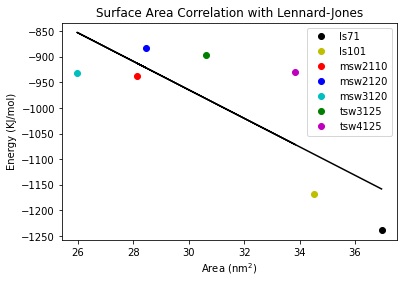

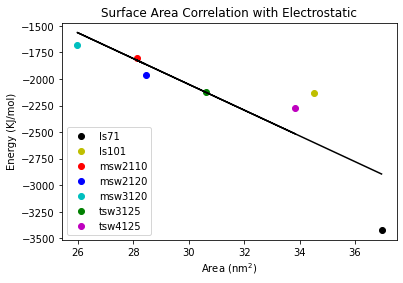

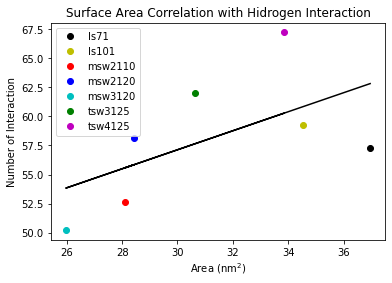

In [46]:
plot_banding2('sasa','LJSR')
plot_banding2('sasa','CSR')
plot_banding2('sasa','hbond')

**Corelation Graph**

In [136]:
X2 = [mean_50['sasa'],mean_50['LJSR'],mean_50['CSR'],mean_50['hbond']]
X_corrcoef = np.corrcoef(X2)

In [106]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

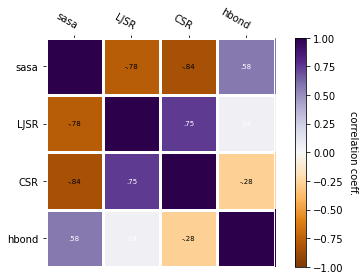

In [137]:
feature_a = list(X)

fig, ax = plt.subplots()

corr_matrix = np.corrcoef(X2)
im, _ = heatmap(corr_matrix, feature_a, feature_a, ax=ax,
                cmap="PuOr", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")
def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")
annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)

fig.tight_layout()
plt.show()